# Kaggle Competion: Find the secret binary outcome

Completed by: Yuejia Feng<br>
Public leader board score: 0.89393<br>
Private leader board score: 0.89719<br>

## 1.  Import Libraries

First of some preparation. I imported python libraries containing the necessary functionality I will need.

In [4]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation
from sklearn import metrics
import xgboost as xgb
import lightgbm as lgb

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC, LinearSVC

/Users/florafeng/software/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/florafeng/software/Anaconda/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You 

## 2. Load data
I then started by acquiring the training and testing datasets into Pandas DataFrames with the Python Pandas packages.

In [33]:
train_df = pd.read_csv('all/train_final.csv')
test_df = pd.read_csv('all/test_final.csv')

## 3. Analyze by describing data

In [7]:
# preview the data
train_df.head()

,Id,Y,f1,f2,f3,f4,f5,f6,f7,f8,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,1,1,25884,1,33.63,118596,1,0,118595,125738,...,1945,118450,119184,1,121372,1,1,1,2,1
1,2,1,34346,1,10.62,118041,1,0,117902,130913,...,15385,117945,292795,1,259173,1,1,1,1,1
2,3,1,34923,1,1.77,118327,1,0,117961,124402,...,7547,118933,290919,1,118784,1,1,1,1,1
3,4,1,80926,1,30.09,118300,1,0,117961,301218,...,4933,118458,118331,1,307024,1,1,1,2,1
4,5,1,4674,1,1.77,119921,1,0,119920,302830,...,13836,142145,4673,1,128230,1,1,1,620,1


In [9]:
train_df.tail()

,Id,Y,f1,f2,f3,f4,f5,f6,f7,f8,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
16378,16379,1,33328,1,1.77,118343,1,0,117961,117906,...,4533,118700,290919,1,118321,1,1,1,1,1
16379,16380,1,19944,1,1.77,118225,1,0,117961,132097,...,4663,120323,119095,3,132096,1,1,1,8,1
16380,16381,1,28359,1,3.54,118327,1,0,117961,174445,...,7822,118492,270488,1,132692,1,2,1,1,1
16381,16382,1,7542,1,3.54,118343,1,0,117961,117906,...,6257,120722,290919,1,118784,1,1,1,12,1
16382,16383,1,13877,1,1.77,118220,1,0,118219,117879,...,13262,118221,19721,1,117879,1,1,1,2,1


In [11]:
test_df.head()

,Id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,16384,37733,1,1.77,118603,1,0,118602,118097,1,...,13881,117941,117887,1,117885,1,1,1,1,1
1,16385,312129,1,3.54,118052,1,0,117961,290919,1,...,14638,118992,290919,1,118321,1,1,1,7,1
2,16386,24884,1,23.01,118300,1,0,117961,302830,1,...,770,119181,4673,1,128230,1,1,1,14,1
3,16387,4674,1,1.77,119091,1,0,119062,118036,1,...,16752,143531,290919,1,117905,1,1,1,81,1
4,16388,68725,1,3.54,118300,1,0,117961,171056,1,...,4945,118360,118638,1,118636,1,1,1,1,1


In [12]:
test_df.tail()

,Id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
16380,32764,971,1,1.77,118300,1,0,117961,310997,1,...,4864,123055,118424,1,120344,1,1,1,44,1
16381,32765,105802,1,1.77,118327,1,0,117961,117906,1,...,32457,118320,290919,1,118321,1,1,1,4,1
16382,32766,43096,1,3.54,117962,1,0,117961,118368,1,...,2014,117904,117887,1,118368,1,1,1,1,1
16383,32767,31220,1,1.77,118386,1,0,117961,117906,1,...,1249,118910,290919,1,118321,1,1,1,2,2
16384,32768,41642,1,3.54,118052,1,0,117961,172635,1,...,13854,118821,290919,1,117905,1,1,1,1,1


Find the features are available in the dataset and we note that the meanings of the features were not revealed.

In [8]:
print(train_df.columns.values)

['Id' 'Y' 'f1' 'f2' 'f3' 'f4' 'f5' 'f6' 'f7' 'f8' 'f9' 'f10' 'f11' 'f12'
 'f13' 'f14' 'f15' 'f16' 'f17' 'f18' 'f19' 'f20' 'f21' 'f22' 'f23' 'f24']


I then tried to see the data types for the various features and to check if there's null in the data sets.

In [13]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 26 columns):
Id     16383 non-null int64
Y      16383 non-null int64
f1     16383 non-null int64
f2     16383 non-null int64
f3     16383 non-null float64
f4     16383 non-null int64
f5     16383 non-null int64
f6     16383 non-null int64
f7     16383 non-null int64
f8     16383 non-null int64
f9     16383 non-null int64
f10    16383 non-null int64
f11    16383 non-null int64
f12    16383 non-null int64
f13    16383 non-null int64
f14    16383 non-null float64
f15    16383 non-null int64
f16    16383 non-null int64
f17    16383 non-null int64
f18    16383 non-null int64
f19    16383 non-null int64
f20    16383 non-null int64
f21    16383 non-null int64
f22    16383 non-null int64
f23    16383 non-null int64
f24    16383 non-null int64
dtypes: float64(2), int64(24)
memory usage: 3.2 MB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16385 entries, 0 

After showing the information of the training and testing data set, we can find that the data are belonging to int64 or float64 and there's no null data.

Then I continue to have a look at some key information about the numeric variables.

In [14]:
train_df.describe()

,Id,Y,f1,f2,f3,f4,f5,f6,f7,f8,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
count,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,...,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,1.638300e+04,16383.000000
mean,8192.000000,0.942135,43007.775865,1.044375,11.770938,118323.581456,1.044436,0.050052,117089.674113,169730.178600,...,25894.316914,119045.099005,184622.040835,1.047305,125959.667765,1.044558,1.045718,1.041934,3.271890e+04,1.043948
std,4729.509065,0.233495,33611.182771,0.264806,353.187115,4518.059755,0.265601,0.293892,10261.292970,69396.677853,...,36086.993946,18321.987129,100590.811845,0.306239,31091.344158,0.262576,0.266874,0.246597,3.184929e+06,0.259640
min,1.000000,0.000000,-1.000000,1.000000,1.770000,23779.000000,1.000000,0.000000,4292.000000,4673.000000,...,25.000000,4674.000000,3130.000000,1.000000,117879.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
25%,4096.500000,1.000000,20311.000000,1.000000,1.770000,118096.000000,1.000000,0.000000,117961.000000,117906.000000,...,4554.000000,118395.000000,118398.000000,1.000000,118274.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
50%,8192.000000,1.000000,35527.000000,1.000000,1.770000,118300.000000,1.000000,0.000000,117961.000000,128130.000000,...,13234.000000,118929.000000,119095.000000,1.000000,118568.000000,1.000000,1.000000,1.000000,2.000000e+00,1.000000
75%,12287.500000,1.000000,74240.500000,1.000000,3.540000,118386.000000,1.000000,0.000000,117961.000000,234498.500000,...,38902.000000,120539.000000,290919.000000,1.000000,120006.000000,1.000000,1.000000,1.000000,9.000000e+00,1.000000
max,16383.000000,1.000000,312152.000000,7.000000,43910.160000,286791.000000,9.000000,10.000000,311178.000000,311867.000000,...,311696.000000,286792.000000,308574.000000,18.000000,311867.000000,8.000000,8.000000,7.000000,4.042886e+08,8.000000


## 4. Analyze by visualizing data

Plot the distribution of the labels in the training dataset

/Users/florafeng/software/Anaconda/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


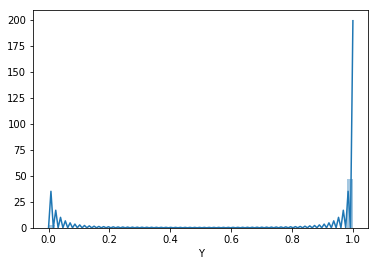

In [28]:
train_labels = train_df.pop('Y')
ax = sns.distplot(train_labels)

In [17]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 30 , 20 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

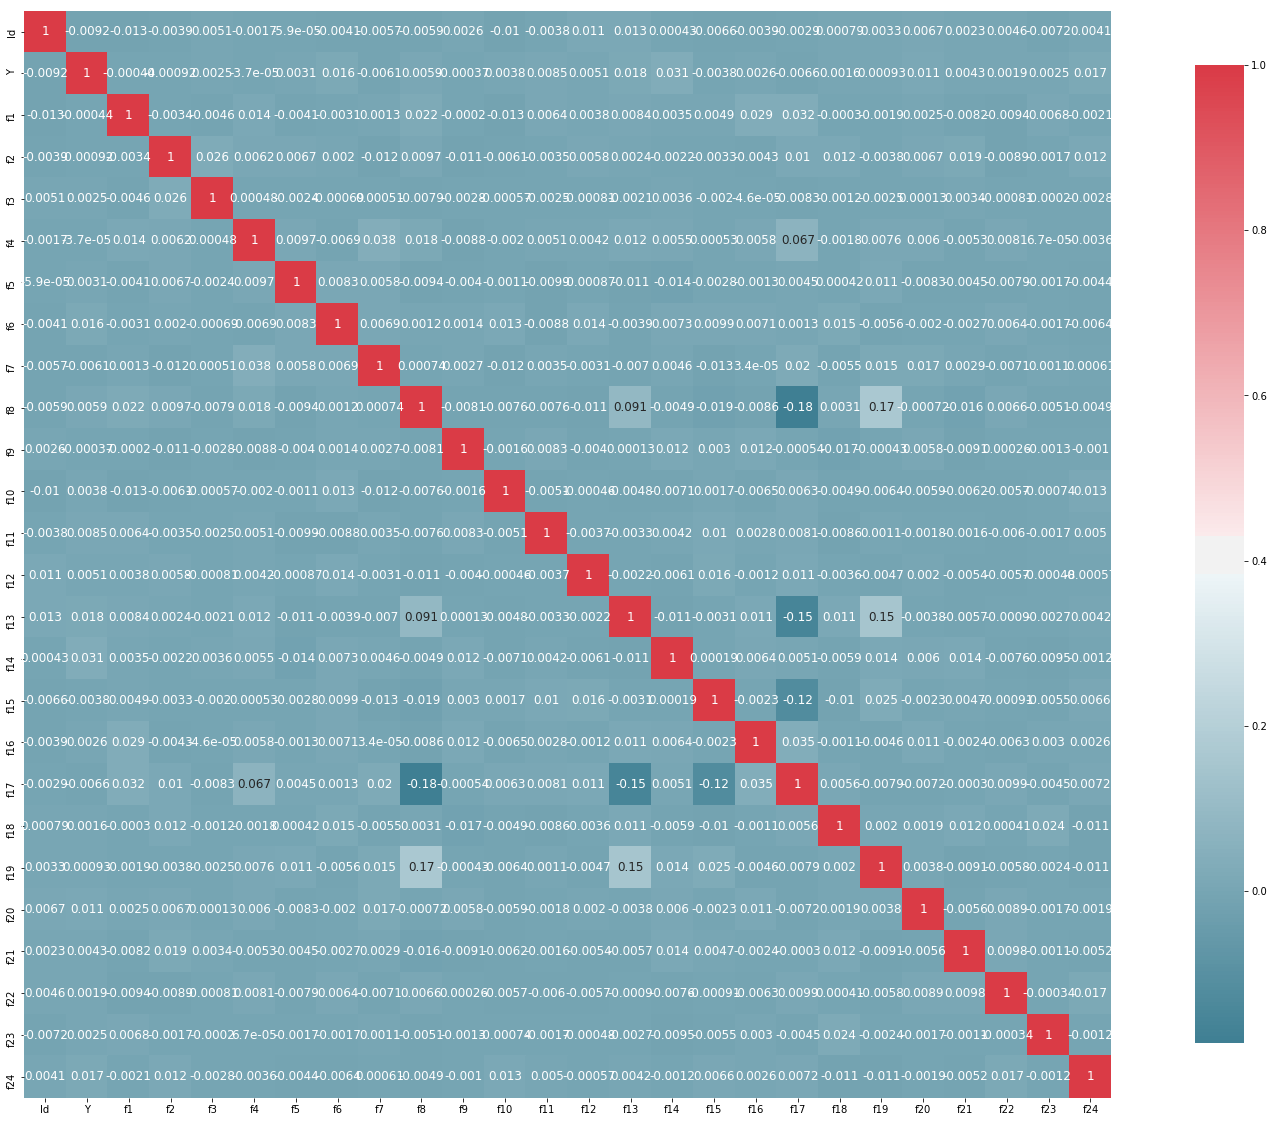

In [16]:
plot_correlation_map(train_df )

It is showing that the features don't have strong correlations with each other. And none of the features has an obvious correlation with our target Y. We can not easily figure out the importance of the features only by the correlation map. Then I continue to plot the relationship of each feature with Y.

Further explore the relationship between some features and target Y.

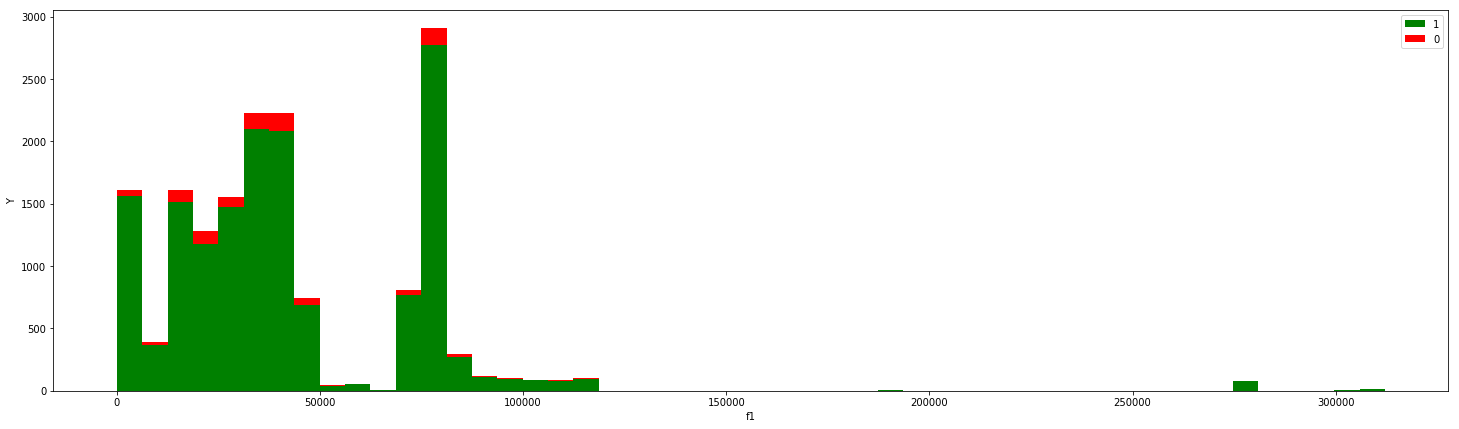

In [18]:
# For feature f1
figure = plt.figure(figsize=(25, 7))
plt.hist([train_df[train_df['Y'] == 1]['f1'], train_df[train_df['Y'] == 0]['f1']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['1','0'])
plt.xlabel('f1')
plt.ylabel('Y')
plt.legend();

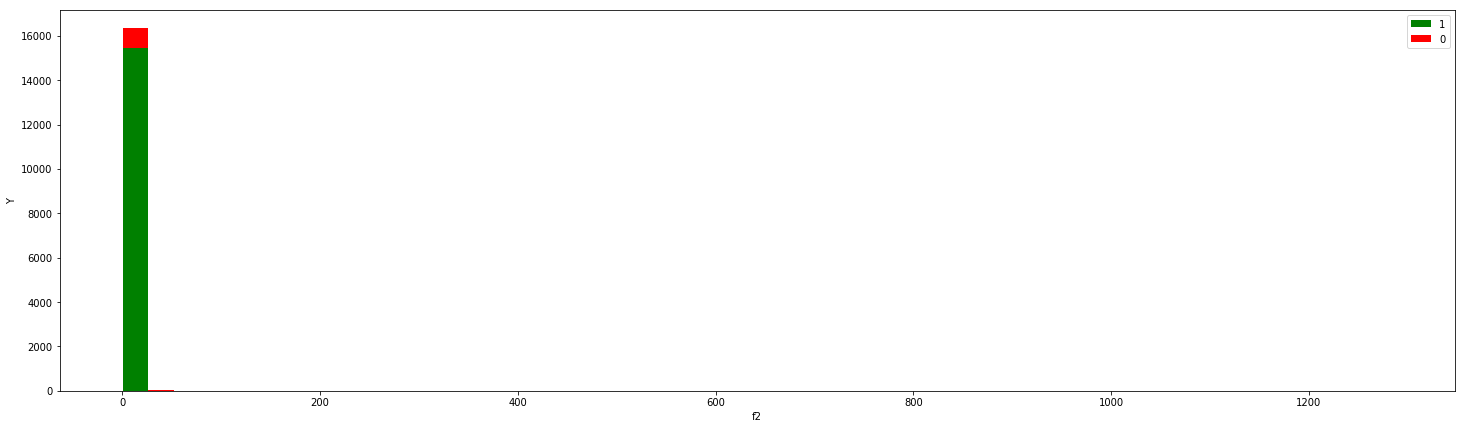

In [19]:
# f2
figure = plt.figure(figsize=(25, 7))
plt.hist([train_df[train_df['Y'] == 1]['f2'], train_df[train_df['Y'] == 0]['f3']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['1','0'])
plt.xlabel('f2')
plt.ylabel('Y')
plt.legend();

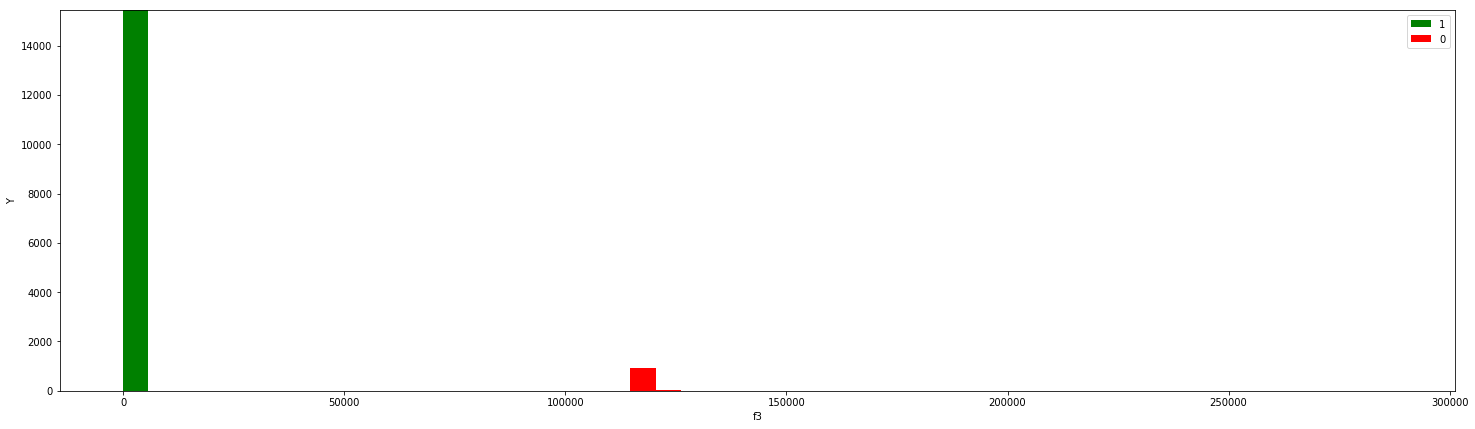

In [20]:
# f3
figure = plt.figure(figsize=(25, 7))
plt.hist([train_df[train_df['Y'] == 1]['f3'], train_df[train_df['Y'] == 0]['f4']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['1','0'])
plt.xlabel('f3')
plt.ylabel('Y')
plt.legend();

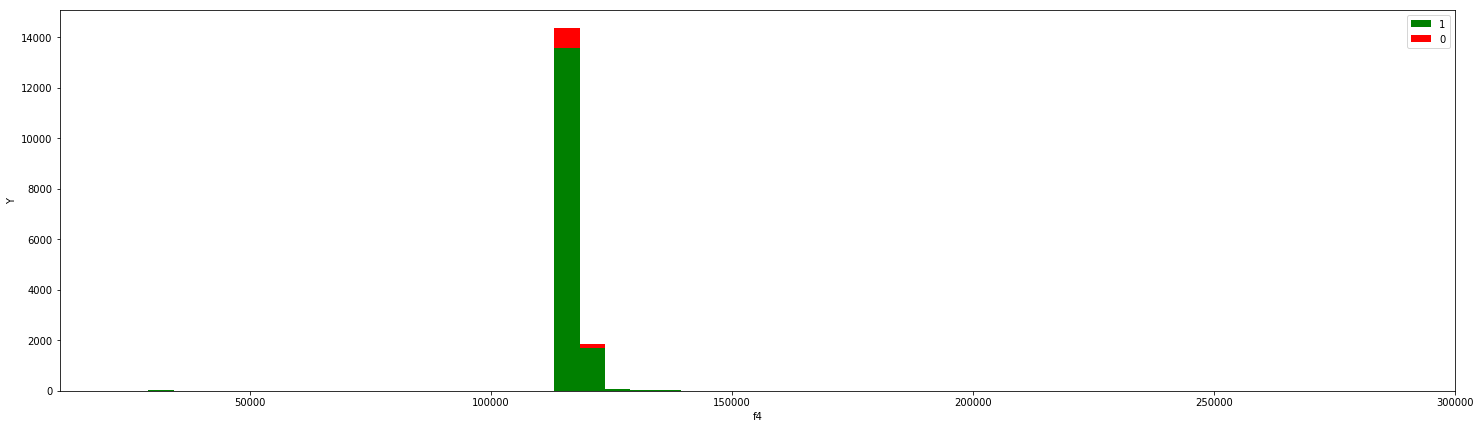

In [21]:
# f4
figure = plt.figure(figsize=(25, 7))
plt.hist([train_df[train_df['Y'] == 1]['f4'], train_df[train_df['Y'] == 0]['f4']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['1','0'])
plt.xlabel('f4')
plt.ylabel('Y')
plt.legend();

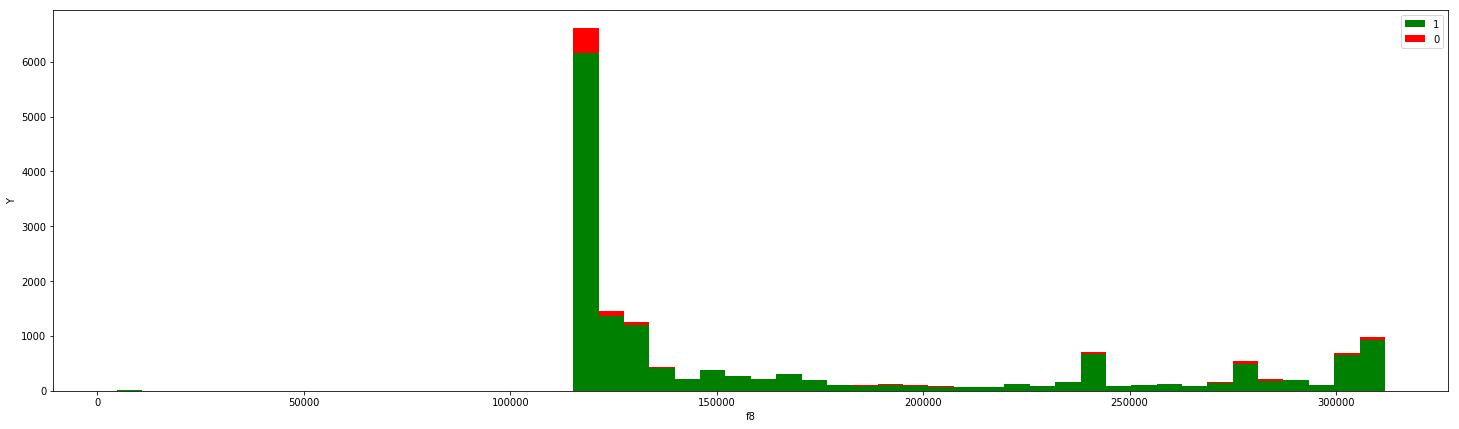

In [22]:
# f8
figure = plt.figure(figsize=(25, 7))
plt.hist([train_df[train_df['Y'] == 1]['f8'], train_df[train_df['Y'] == 0]['f8']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['1','0'])
plt.xlabel('f8')
plt.ylabel('Y')
plt.legend();

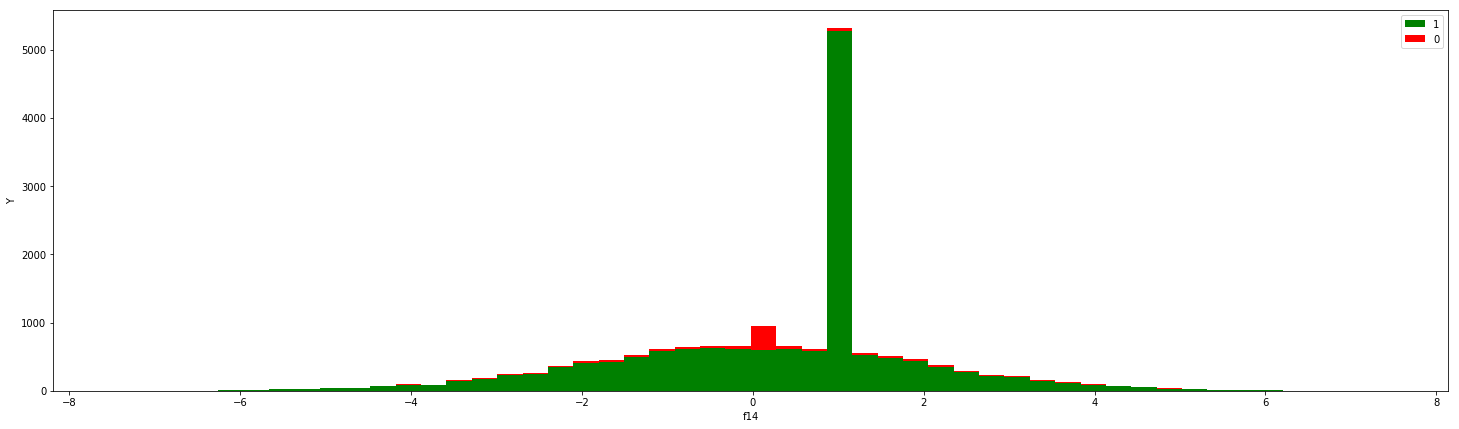

In [23]:
# f14
figure = plt.figure(figsize=(25, 7))
plt.hist([train_df[train_df['Y'] == 1]['f14'], train_df[train_df['Y'] == 0]['f14']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['1','0'])
plt.xlabel('f14')
plt.ylabel('Y')
plt.legend();

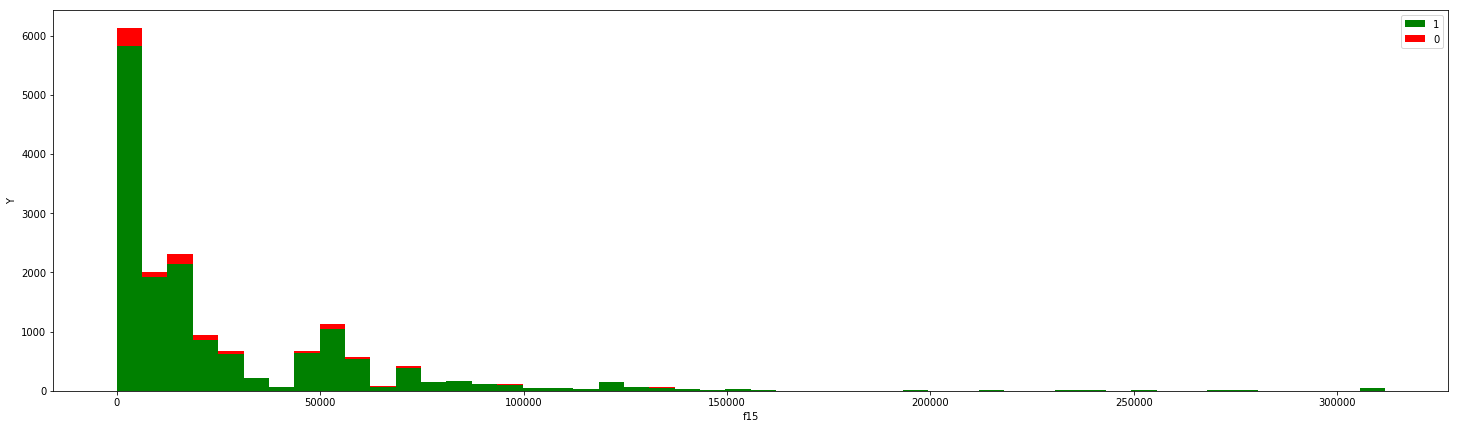

In [24]:
# f15
figure = plt.figure(figsize=(25, 7))
plt.hist([train_df[train_df['Y'] == 1]['f15'], train_df[train_df['Y'] == 0]['f15']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['1','0'])
plt.xlabel('f15')
plt.ylabel('Y')
plt.legend();

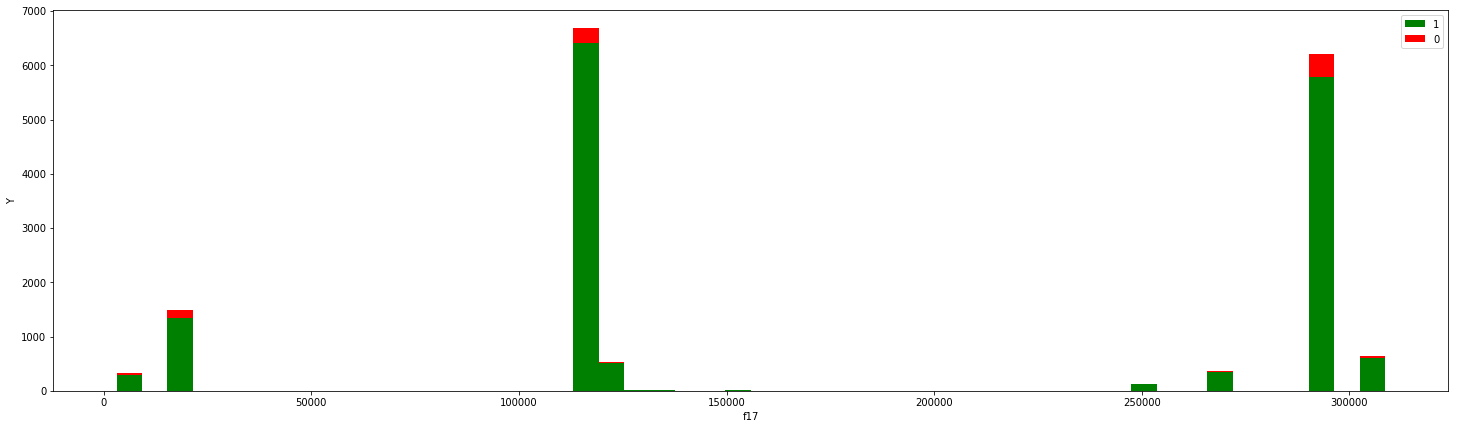

In [25]:
# f17
figure = plt.figure(figsize=(25, 7))
plt.hist([train_df[train_df['Y'] == 1]['f17'], train_df[train_df['Y'] == 0]['f17']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['1','0'])
plt.xlabel('f17')
plt.ylabel('Y')
plt.legend();

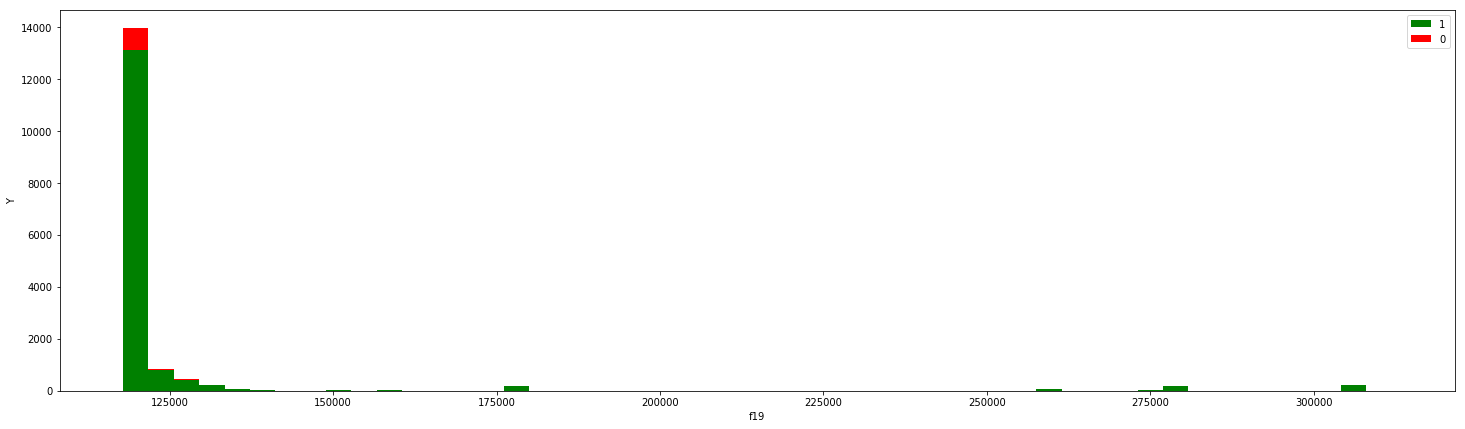

In [26]:
# f19
figure = plt.figure(figsize=(25, 7))
plt.hist([train_df[train_df['Y'] == 1]['f19'], train_df[train_df['Y'] == 0]['f19']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['1','0'])
plt.xlabel('f19')
plt.ylabel('Y')
plt.legend();

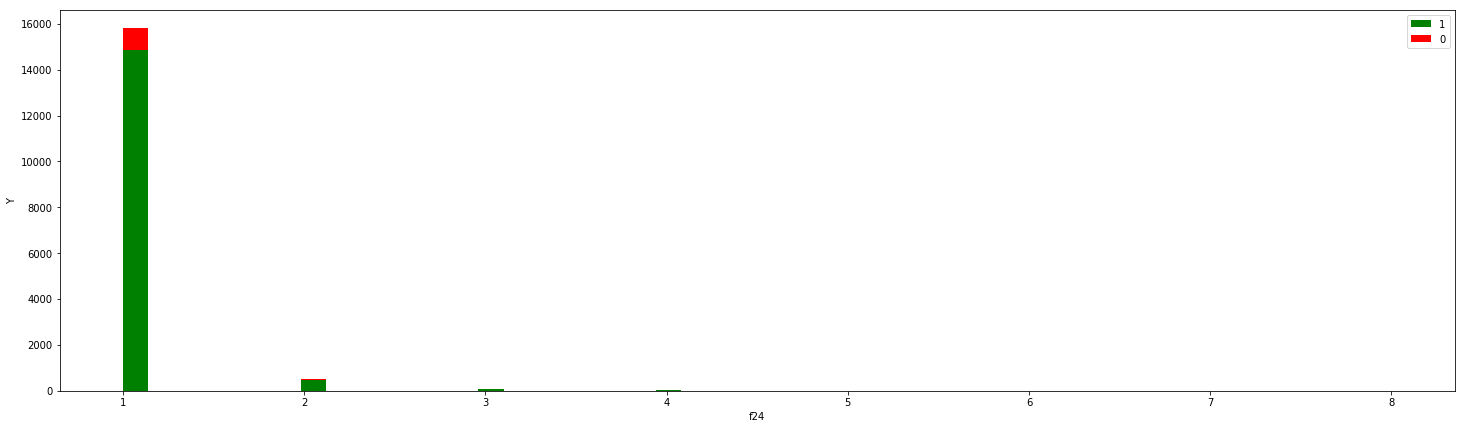

In [27]:
# f24
figure = plt.figure(figsize=(25, 7))
plt.hist([train_df[train_df['Y'] == 1]['f24'], train_df[train_df['Y'] == 0]['f24']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['1','0'])
plt.xlabel('f24')
plt.ylabel('Y')
plt.legend();

## 5. Data preparation 

In [34]:
X_train = train_df.iloc[:,2:]
Y_train = train_df["Y"]
X_test  = test_df.iloc[:,1:]
X_train.shape, Y_train.shape, X_test.shape
#X_test.head()

((16383, 24), (16383,), (16385, 24))

Splitting to train and validation sets

In [35]:
X_dtrain,X_dtest,y_dtrain,y_dtest = cross_validation.train_test_split(X_train, Y_train, test_size=0.3,random_state=1026)

## 6. Feature selection with random forest classification

In the previous part, I have plot the correlation map of each features and target Y and also plot the distribution of Y on each feature.
It shows the relationship of each feature with target Y to some extent. However, it is difficult to figure out the importance of the features only based on these plots.
Therefore, I decided to use auto feature selection with the help of random forest classification.

In [36]:
clf = RandomForestClassifier(n_estimators=100, max_features='sqrt')
clf = clf.fit(X_train, Y_train)

Visualize the importance of features.

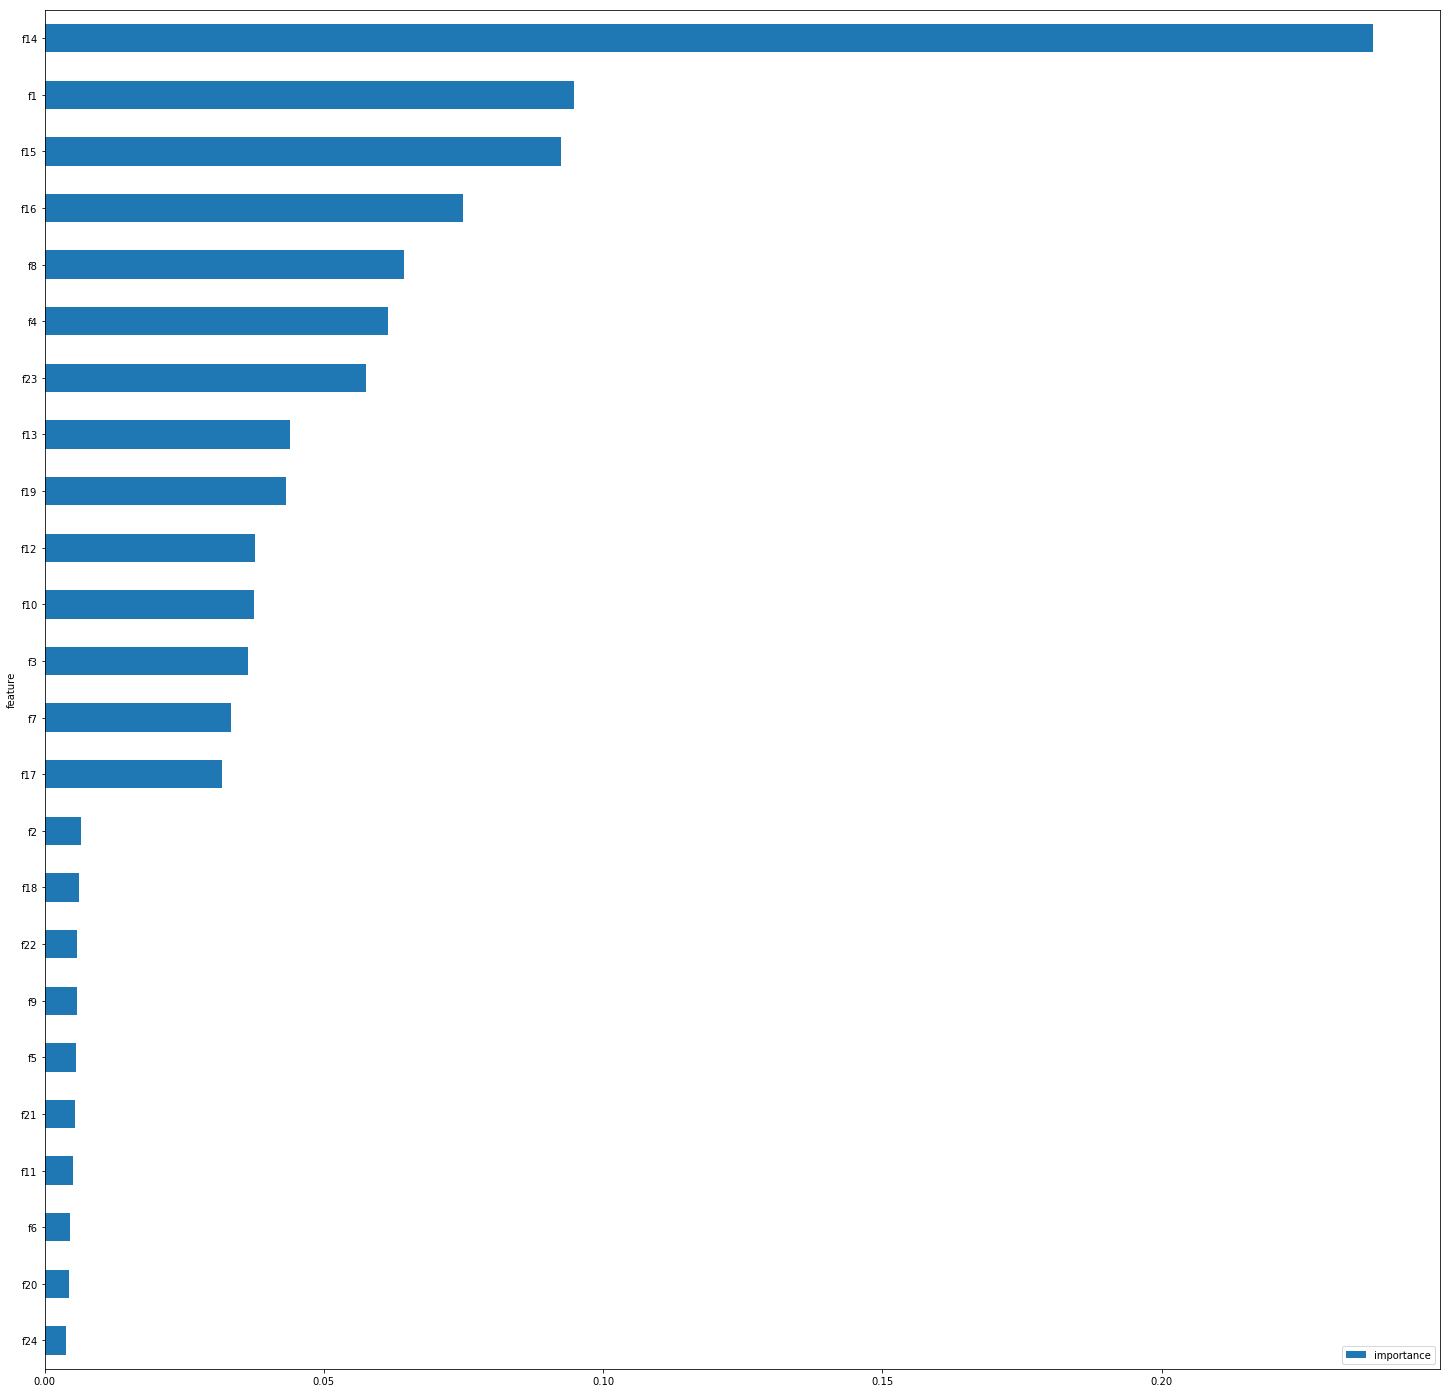

In [37]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(25, 25))

Now transform the train set and test set in a more compact datasets.

In [39]:
model = SelectFromModel(clf, prefit=True)
X_train_re = model.transform(X_train)
print(X_train_re.shape)
X_test_re = model.transform(X_test)
print(X_test_re.shape)

(16383, 9)
(16385, 9)


It is showing that the model RandomForestClassifier helps us select the 9 features that have a higher importance among all the features.
And we can continue out model training with these 9 features selected in the following steps.

Split the more compact train dataset to train and validation sets.

In [44]:
X_dtrain_re,X_dtest_re,y_dtrain_re,y_dtest_re = cross_validation.train_test_split(X_train_re, Y_train, test_size=0.3,random_state=1026)

## 7. Model Selection

To decide the model, I firstly try different base models and compare their AUC values.

In [45]:
def compute_score(clf, X, y, scoring='roc_auc'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [48]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
svc = SVC()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()
lg = lgb.LGBMClassifier()
xgbc = xgb.XGBClassifier()

models = [logreg, logreg_cv, svc,rf, gboost,lg,xgbc]

In [49]:
for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=X_train_re, y=Y_train)
    print ('CV score = {0}'.format(score))
    print( '****')

Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
CV score = 0.48649177383223385
****
Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>
CV score = 0.5109178193296653
****
Cross-validation of : <class 'sklearn.svm.classes.SVC'>
CV score = 0.5157112492926518
****
Cross-validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
CV score = 0.7758151975699246
****
Cross-validation of : <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
CV score = 0.8494263932516025
****
Cross-validation of : <class 'lightgbm.sklearn.LGBMClassifier'>
CV score = 0.8653172072823242
****
Cross-validation of : <class 'xgboost.sklearn.XGBClassifier'>
CV score = 0.8457242808276856
****


It is showing the last 3 models have a better performance and they are GradientBoostingClassifier, LGBMClassifier, XGBClassifier. Then we will continue to use these three models for following step and to figure out the hyper-parameters of each models to make them work better.

## 8. Hyperparameters tuning

I will then firstly used the train set and validation set splited from the whole compact training data set in the following steps to find the hyper-parameters.
Then after the model decided, I will re-train the model on the full training set before making predictions to upload.

__ Hyperparameters tuning on LGBClassifier__

Firstly, I worked on finding the hyper-parameters of lgbclassifier with using GridSearchCV.

In [9]:
##max_depth
cv_params = {'max_depth': [2,3,5,7,9]}
other_params = {'n_estimators':800, 'learning_rate':0.1, 'max_depth':2, 'num_leaves':300}
lg = lgb.LGBMClassifier(**other_params, silent=False)
grid = GridSearchCV(estimator=lg, param_grid=cv_params, scoring='roc_auc', cv=5, verbose=1, n_jobs=4)

grid.fit(X_dtrain_re,y_dtrain_re)



#print("Test set score:{0}".format(grid.score(y_dtest_re,pred)))
print("Best parameters:{}".format(grid.best_params_))
print("Best score on train set:{0}".format(grid.best_score_))


best_model=grid.best_estimator_
pred=best_model.predict_proba(X_dtest_re)
metrics.roc_auc_score(y_dtest_re,pred[:,1])

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:   52.3s finished


Best parameters:{'max_depth': 2}
Best score on train set:0.8483268914219335


0.8389693696169269

In [8]:
#n_estimators
cv_params = {'n_estimators': [500,650,600,550,700]}
other_params = {'n_estimators':600, 'learning_rate':0.1, 'max_depth':2, 'num_leaves':300}

lg = lgb.LGBMClassifier(**other_params, silent=False)
grid = GridSearchCV(estimator=lg, param_grid=cv_params, scoring='roc_auc', cv=5, verbose=1, n_jobs=4)

grid.fit(X_dtrain_re,y_dtrain_re)



#print("Test set score:{0}".format(grid.score(y_dtest_re,pred)))
print("Best parameters:{}".format(grid.best_params_))
print("Best score on train set:{0}".format(grid.best_score_))


best_model=grid.best_estimator_
pred=best_model.predict_proba(X_dtest_re)
metrics.roc_auc_score(y_dtest_re,pred[:,1])

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:   12.3s finished


Best parameters:{'n_estimators': 600}
Best score on train set:0.8486950287938919


0.8372848559790931

In [ ]:
#n_estimators
cv_params = {'num_leaves': [2,3,5]}
other_params = {'n_estimators':600, 'learning_rate':0.1, 'max_depth':2, 'num_leaves':300}

lg = lgb.LGBMClassifier(**other_params, silent=False)
grid = GridSearchCV(estimator=lg, param_grid=cv_params, scoring='roc_auc', cv=5, verbose=1, n_jobs=4)

grid.fit(X_dtrain_re,y_dtrain_re)



#print("Test set score:{0}".format(grid.score(y_dtest_re,pred)))
print("Best parameters:{}".format(grid.best_params_))
print("Best score on train set:{0}".format(grid.best_score_))


best_model=grid.best_estimator_
pred=best_model.predict_proba(X_dtest_re)
metrics.roc_auc_score(y_dtest_re,pred[:,1])

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [8]:
#n_estimators
cv_params = {'learning_rate': [0.01,0.05,0.1,0.2]}
other_params = {'n_estimators':600, 'learning_rate':0.2, 'max_depth':2, 'num_leaves':5}

lg = lgb.LGBMClassifier(**other_params, silent=False)
grid = GridSearchCV(estimator=lg, param_grid=cv_params, scoring='roc_auc', cv=5, verbose=1, n_jobs=4)

grid.fit(X_dtrain_re,y_dtrain_re)



#print("Test set score:{0}".format(grid.score(y_dtest_re,pred)))
print("Best parameters:{}".format(grid.best_params_))
print("Best score on train set:{0}".format(grid.best_score_))


best_model=grid.best_estimator_
pred=best_model.predict_proba(X_dtest_re)
metrics.roc_auc_score(y_dtest_re,pred[:,1])

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    7.7s finished


Best parameters:{'learning_rate': 0.2}
Best score on train set:0.8491212085888042


0.8446948554352399

__ Hyperparameters tuning on GradientBoostingClassifier__

Then I worked on finding the hyper-parameters of GradientBoostingClassifier with using GridSearchCV.

In [74]:
#n_estimators
cv_params = {'learning_rate': [0.08,0.1,0.15]}
other_params = {'n_estimators':70, 'learning_rate':0.1, 'max_depth':7, 'max_features':'sqrt',
                                   'min_samples_leaf':15, 'min_samples_split':600, 
                                   'random_state' :5, 'subsample':0.8}

gb = GradientBoostingClassifier(**other_params)
grid = GridSearchCV(estimator=gb, param_grid=cv_params, scoring='roc_auc', cv=5, verbose=1, n_jobs=4)

grid.fit(X_dtrain_re,y_dtrain_re)



#print("Test set score:{0}".format(grid.score(y_dtest_re,pred)))
print("Best parameters:{}".format(grid.best_params_))
print("Best score on train set:{0}".format(grid.best_score_))


best_model=grid.best_estimator_
pred=best_model.predict_proba(X_dtest_re)
metrics.roc_auc_score(y_dtest_re,pred[:,1])

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    2.9s finished


Best parameters:{'learning_rate': 0.15}
Best score on train set:0.8455026444858897


0.8399855163313382

__ Hyperparameters tuning on XGBClassifier__

Finally, I worked on finding the hyper-parameters of XGBClassifier with using GridSearchCV.

In [137]:
cv_params = {'gamma':[0,0.1,0.2,0.3,0.4]}
other_params = {'booster':'gbtree','learning_rate': 0.1, 'n_estimators': 315, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

model = xgb.XGBClassifier(**other_params)
grid = GridSearchCV(estimator=model, param_grid=cv_params, scoring='roc_auc', cv=5, verbose=1, n_jobs=4)
grid.fit(X_dtrain_re, y_dtrain_re)

#print("Test set score:{0}".format(grid.score(y_dtest_re,pred)))
print("Best parameters:{}".format(grid.best_params_))
print("Best score on train set:{0}".format(grid.best_score_))


best_model=grid.best_estimator_
pred=best_model.predict_proba(X_dtest_re)
metrics.roc_auc_score(y_dtest_re,pred[:,1])

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:   18.9s finished


Best parameters:{'gamma': 0}
Best score on train set:0.8598902667073443


0.8608294047097684

Then we can see that the XGBClassifier has a better performance after we figure out the hyper-parameters. I then use the model
XGBClassifier with
the hyper-parameters to be the model selected for prediction.

## 9. Evaluate the model selected

In [51]:
##xgbclassifier X_dtrain_re,X_dtest_re,y_dtrain_re,y_dtest_re
hyper_params = {'learning_rate': 0.1, 'n_estimators': 350, 'max_depth': 4, 'min_child_weight': 1, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.6, 'gamma': 0.2, 'reg_alpha': 0.1, 'reg_lambda': 0.05}

xgbc = xgb.XGBClassifier(**hyper_params)
x=xgbc.fit(X_dtrain_re, y_dtrain_re)
pred_xgbc = x.predict_proba(X_dtest_re,)
auc_xgbc = metrics.roc_auc_score(y_dtest_re,pred_xgbc[:,1])
auc_xgbc


0.8644077438966794

__Make a prediction with only the model XGBClassifier.__

In [60]:
##xgbclassifier X_dtrain_re,X_dtest_re,y_dtrain_re,y_dtest_re
hyper_params = {'learning_rate': 0.1, 'n_estimators': 350, 'max_depth': 4, 'min_child_weight': 1, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.6, 'gamma': 0.2, 'reg_alpha': 0.1, 'reg_lambda': 0.05}

xgbc = xgb.XGBClassifier(**hyper_params)
x=xgbc.fit(X_train_re, Y_train)
pred1 = x.predict_proba(X_test_re)


In [61]:
submission = pd.DataFrame({
        "Id": test_df["Id"],
        "Y": pred1[:,1]
    })
submission.to_csv('all/submission_pred1.csv', index=False)
#submission.head() 

__After submitting with this result, I got a score of 0.89256__.

## 10. Ensembling final model 

__(1) Ensemble Model 1__

To get a higher score, I then try to ensemble the models. For this step, I simply use the average method.

Firstly, I try to ensemble the three models that has a better performance in step 7.

In [54]:
#lgbclassifier
hyper_params = {'n_estimators':600, 'learning_rate':0.2, 'max_depth':2, 'num_leaves':5}

lgc = lgb.LGBMClassifier(**hyper_params, silent=False)
l=lgc.fit(X_dtrain_re, y_dtrain_re)
pred_lgc = l.predict_proba(X_dtest_re)
auc_lgc = metrics.roc_auc_score(y_dtest_re,pred_lgc[:,1])
auc_lgc 

0.8446948554352399

In [55]:
#GradientBoosting
other_params = {'n_estimators':70, 'learning_rate':0.1, 'max_depth':7, 'max_features':'sqrt',
                                   'min_samples_leaf':15, 'min_samples_split':600, 
                                   'random_state' :5, 'subsample':0.8}

gb = GradientBoostingClassifier(**other_params)
gb.fit(X_dtrain_re, y_dtrain_re)
pred_gb = gb.predict_proba(X_dtest_re)
auc_gb = metrics.roc_auc_score(y_dtest_re,pred_gb[:,1])
auc_gb

0.8403182686004941

In [56]:
ensemble1 =(pred_lgc+ pred_xgbc+pred_gb)/3

In [57]:
auc_en1 = metrics.roc_auc_score(y_dtest_re,ensemble1[:,1])
auc_en1 # 0.8633661935144077 

0.8588164323804454

It is showing that the score is lower then the score from only using the XGBClassifier in last step.

__Make a prediction with the first ensemble model.__

In [62]:
#lgbclassifier
hyper_params = {'n_estimators':600, 'learning_rate':0.2, 'max_depth':2, 'num_leaves':5}

lgc = lgb.LGBMClassifier(**hyper_params, silent=False)
l=lgc.fit(X_train_re, Y_train)
pred2 = l.predict_proba(X_test_re)

In [63]:
#GradientBoosting
other_params = {'n_estimators':70, 'learning_rate':0.1, 'max_depth':7, 'max_features':'sqrt',
                                   'min_samples_leaf':15, 'min_samples_split':600, 
                                   'random_state' :5, 'subsample':0.8}

gb = GradientBoostingClassifier(**other_params)
gb.fit(X_train_re, Y_train)
pred3 = gb.predict_proba(X_test_re)

In [64]:
pred_ensemble1 =(pred1+ pred2+pred3)/3

In [65]:
submission = pd.DataFrame({
        "Id": test_df["Id"],
        "Y":pred_ensemble1[:,1]
    })
submission.to_csv('all/submission_en1.csv', index=False)
#submission.head() 

__After submitting with this result, I got a score of 0.88899. We can tell from the scores that the ensemble model did not perform
better than using XGBClassifier separately.__ 

__(2) Ensemble Model 2__

Then, I try to ensemble the XGBClassifier and SVC and for the ensembling prediction result, I will give a much lower weight to the 
prediction got from the XGBClassifier and will give a higher weight to the result from SVC.

In [68]:
##SVM
svc = SVC(probability=True)
svc.fit(X_dtrain_re, y_dtrain_re)
pred_svc = svc.predict_proba(X_dtest_re)

In [70]:
ensemble2 = 0.05*pred_xgbc+0.95*pred_svc

In [71]:
auc_en2 = metrics.roc_auc_score(y_dtest_re,ensemble2[:,1])
auc_en2 

0.8656113768358622

It is showing that the score is higher then the score from only using the XGBClassifier in last step and the first ensemble model.
Therefore, the second ensemble model with XGBClassifier and SVC may have a better performance.

__Make a prediction with the second ensemble model.__

In [72]:
## Prediction from SVM
svc = SVC(probability=True)
svc.fit(X_train_re, Y_train)
pred4 = svc.predict_proba(X_test_re)

In [73]:
pred_ensemble2 = 0.05*pred1+0.95*pred4

In [74]:
submission = pd.DataFrame({
        "Id": test_df["Id"],
        "Y":pred_ensemble2[:,1]
    })
submission.to_csv('all/submission_en2.csv', index=False)
#submission.head() 

__After submitting with this result, I got an score of 0.89393 on the board which shows that using this ensemble model will have a better 
performance than only using XGBClassifier. I have also tried to ensemble other models like LGBTClassifier, but I didn't get a higher score
than that one.__

## 11. Make a submission

In [76]:
submission = pd.DataFrame({
        "Id": test_df["Id"],
        "Y": pred_ensemble2[:,1]
    })
submission.to_csv('all/finalsubmission.csv', index=False)
#submission.head() 